In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random as rd

In [2]:
dataset = pd.read_csv('kendaraan_train.csv')
dataset.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [3]:
dataset.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,142916.000000,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


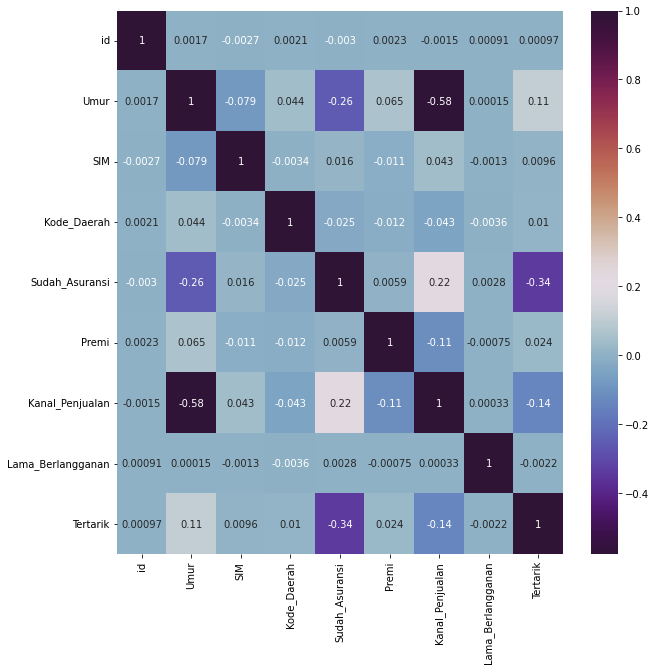

In [5]:
import seaborn as sns
#menkorelasi antar atribut

plt.figure(figsize=(10,10))
cor = dataset.corr()
sns.heatmap(cor,annot=True, cmap=plt.cm.twilight_shifted)
plt.show()

In [6]:
#Mencari total dataset dengan nilai missing
dataset.isnull().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [7]:
#Mengubah data string jadi angka sc:https://www.geeksforgeeks.org/python-pandas-dataframe-replace/
dataset['Jenis_Kelamin'] = dataset[['Jenis_Kelamin']].replace(['Pria', 'Wanita'], [1, 0])
dataset['Kendaraan_Rusak'] = dataset[['Kendaraan_Rusak']].replace(['Pernah', 'Tidak'], [1, 0])
dataset['Umur_Kendaraan'] = dataset[['Umur_Kendaraan']].replace(['< 1 Tahun', '1-2 Tahun', '> 2 Tahun'], [0, 1,2])
dataset

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,0.0,30.0,1.0,33.0,1.0,0.0,0.0,28029.0,152.0,97.0,0
1,2,1.0,48.0,1.0,39.0,0.0,2.0,1.0,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,0.0,0.0,32733.0,160.0,119.0,0
3,4,0.0,58.0,1.0,48.0,0.0,1.0,0.0,2630.0,124.0,63.0,0
4,5,1.0,50.0,1.0,35.0,0.0,2.0,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,0.0,23.0,1.0,4.0,1.0,0.0,0.0,25988.0,152.0,217.0,0
285827,285828,0.0,21.0,1.0,46.0,1.0,0.0,0.0,44686.0,152.0,50.0,0
285828,285829,0.0,23.0,1.0,50.0,1.0,0.0,0.0,49751.0,152.0,226.0,0
285829,285830,1.0,68.0,1.0,7.0,1.0,1.0,0.0,30503.0,124.0,270.0,0


In [8]:
#menghitung jumlah data dari tiap kolom 

# dataset['Umur'].value_counts()
dataset['Jenis_Kelamin'].value_counts()
# df['SIM'].value_counts()
# df['Kode_Daerah'].value_counts()
# df['Sudah_Asuransi'].value_counts()
# df['Umur_Kendaraan'].value_counts()
# df['Kendaraan_Rusak'].value_counts()
# df['Kanal_Penjualan'].value_counts()
# df['Lama_Berlangganan'].value_counts()
# df['Tertarik'].value_counts()

1.0    146678
0.0    124713
Name: Jenis_Kelamin, dtype: int64

In [9]:
#mengisi data nul sesuai dengan modus dan rata2 
dataset['Umur'] = dataset['Umur'].fillna(dataset['Umur'].mean())
dataset['Jenis_Kelamin']= dataset['Jenis_Kelamin'].fillna(1)
dataset['SIM']= dataset['SIM'].fillna(1.0)
dataset['Kode_Daerah']= dataset['Kode_Daerah'].fillna(28.0)
dataset['Sudah_Asuransi']= dataset['Sudah_Asuransi'].fillna(0.0)
dataset['Umur_Kendaraan']= dataset['Umur_Kendaraan'].fillna(1)
dataset['Premi'] = dataset['Premi'].fillna(dataset['Premi'].mean())
dataset['Kendaraan_Rusak']= dataset['Kendaraan_Rusak'].fillna(1)
dataset['Kanal_Penjualan']= dataset['Kanal_Penjualan'].fillna(152.0)
dataset['Lama_Berlangganan']= dataset['Lama_Berlangganan'].fillna(158.0)
dataset['Tertarik']= dataset['Tertarik'].fillna(0)

In [10]:
dataset.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,0.0,30.0,1.0,33.0,1.0,0.0,0.0,28029.0,152.0,97.0,0
1,2,1.0,48.0,1.0,39.0,0.0,2.0,1.0,25800.0,29.0,158.0,0
2,3,1.0,21.0,1.0,46.0,1.0,0.0,0.0,32733.0,160.0,119.0,0
3,4,0.0,58.0,1.0,48.0,0.0,1.0,0.0,2630.0,124.0,63.0,0
4,5,1.0,50.0,1.0,35.0,0.0,2.0,1.0,34857.0,88.0,194.0,0


In [11]:
#mengecek data null kembali
dataset.isnull().sum()

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [12]:
df_copy = (dataset[['Umur', 'Kode_Daerah', 'Sudah_Asuransi', 'Premi']])
df_copy

,Umur,Kode_Daerah,Sudah_Asuransi,Premi
0,30.0,33.0,1.0,28029.0
1,48.0,39.0,0.0,25800.0
2,21.0,46.0,1.0,32733.0
3,58.0,48.0,0.0,2630.0
4,50.0,35.0,0.0,34857.0
...,...,...,...,...
285826,23.0,4.0,1.0,25988.0
285827,21.0,46.0,1.0,44686.0
285828,23.0,50.0,1.0,49751.0
285829,68.0,7.0,1.0,30503.0


In [13]:
converttoCSV = dataset.copy()
converttoCSV.to_csv('kendaraan_train_clean.csv')
#export bentuk CSV hasil dataset preprocessing

In [14]:
#normalisasi buat dapat nilai antara 0 dan 1 referensi: https://www.youtube.com/watch?v=MdqRiqqdzW0
def scale_features(df_copy):
    scalar = df_copy.copy()
    for column in scalar.columns:
      scalar[column]=(scalar[column] - scalar[column].min()) / (scalar[column].max() - scalar[column].min())
    return scalar
df_copy=scale_features(df_copy)

In [15]:
df_copy

,Umur,Kode_Daerah,Sudah_Asuransi,Premi
0,0.153846,0.634615,1.0,0.047251
1,0.430769,0.750000,0.0,0.043104
2,0.015385,0.884615,1.0,0.056002
3,0.584615,0.923077,0.0,0.000000
4,0.461538,0.673077,0.0,0.059953
...,...,...,...,...
285826,0.046154,0.076923,1.0,0.043454
285827,0.015385,0.884615,1.0,0.078239
285828,0.046154,0.961538,1.0,0.087661
285829,0.738462,0.134615,1.0,0.051853


In [16]:
converttoCSV = df_copy.copy()
converttoCSV.to_csv('df_copy.csv')
#export bentuk CSV hasil preprocessing sampel

#FUNGSI CLUSTERING


#Centroid

In [17]:
# membuat centroid () dengan menentukan k
def centroid (df_copy):
    k = 4
    i = 0
    centroids = {
        i + 1 : [rd.choices(df_copy['Kode_Daerah']),rd.choices(df_copy['Premi'])]
        for i in range(k)
    }
    return centroids

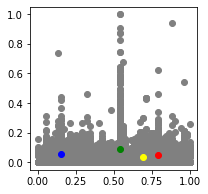

In [18]:
# menentukan persebaran data centroid
centroid_sebar = centroid(df_copy)

fig = plt.figure(figsize=(3,3))
plt.scatter(df_copy['Kode_Daerah'], df_copy['Premi'], color='gray')
colmap = {1: 'red', 2: 'green', 3: 'blue', 4: 'yellow'}
for i in centroid_sebar.keys():
    plt.scatter(*centroid_sebar[i], color = colmap[i])
plt.show()

In [19]:
def centroidindexpick(k,df_copy):
  return np.random.choice(len(df_copy['Kode_Daerah']),k, replace=False)

In [20]:
centroidindexpick(4, df_copy)

array([245103,  13779,  34200,  72477])

#memilih centroid

In [21]:
def centroidpick(key,dfq):
  k = centroidindexpick(key,dfq)
  centroid = []
  for i in k:
    centroid.append([i,list(dfq.iloc[i])])
  return centroid

In [22]:
centroid = centroidpick(4,df_copy)
centroid

[[39345, [0.5846153846153846, 0.6730769230769231, 0.0, 0.07910368627159162]],
 [77762, [0.12307692307692308, 0.6346153846153846, 1.0, 0.05516291962383845]],
 [223528, [0.6, 0.5384615384615384, 0.0, 0.08132679732482535]],
 [120511, [0.03076923076923077, 0.6153846153846154, 1.0, 0.05191603053209111]]]

#menghitungjarak

In [23]:
def euclidean(md, mc):
  sum = 0
  for i in range(len(md)):
    sum = sum + (md[i]-mc[i])**2
  return np.sqrt(sum)

In [24]:
def jarak(md, mc):
  pilihCluster = []
  for i in range(len(mc)):
    temp = []
    for j in range(len(list(md))):
      p1 = mc[i][1]
      p2 = list(md.iloc[j])
      temp.append([str(i), euclidean(p1, p2)])
    
    pilihCluster.append(temp)

  return pilihCluster

In [25]:
jarak(df_copy, centroid)

[[['0', 1.0899798262338478],
  ['0', 0.1757320801423654],
  ['0', 1.1701734402523927],
  ['0', 0.26221630990797345]],
 [['1', 0.03177020594146313],
  ['1', 1.0526792384786088],
  ['1', 0.2722100973191288],
  ['1', 1.1398555866215307]],
 [['2', 1.0997545112139144],
  ['2', 0.27358461800161377],
  ['2', 1.2092307396854152],
  ['2', 0.3934205490775565]],
 [['3', 0.12465759158465793],
  ['3', 1.0854487323968238],
  ['3', 0.26970092344014207],
  ['3', 1.1849537512364794]]]

In [26]:
# menghitung jarak terdekat ke centroid
def hitung(df_copy, centroids):
    for i in centroids.keys():
      # sqrt((x1 - x2)^2 - (y1 - y2)^2) euclidean distance
        df_copy['jarakdari{}'.format(i)] = (
            np.sqrt(
                (df_copy['Kode_Daerah'] - centroids[i][0])**2 + (df_copy['Premi'] - centroids[i][1])**2
            )
        )
    centroid_distance_cols = ['jarakdari{}'.format(i) for i in centroids.keys()]
    df_copy['terdekat'] = df_copy.loc[:, centroid_distance_cols].idxmin(axis=1)
    df_copy['terdekat'] = df_copy['terdekat'].map(lambda x: int(x.lstrip('jarakdari')))
    df_copy['color'] = df_copy['terdekat'].map(lambda x: colmap[x])
    return df_copy

df_copy = hitung(df_copy, centroid_sebar)
df_copy.head()

,Umur,Kode_Daerah,Sudah_Asuransi,Premi,jarakdari1,jarakdari2,jarakdari3,jarakdari4,terdekat,color
0,0.153846,0.634615,1.0,0.047251,0.153881,0.104831,0.480810,0.058983,4,yellow
1,0.430769,0.750000,0.0,0.043104,0.039168,0.216463,0.596245,0.058262,1,red
2,0.015385,0.884615,1.0,0.056002,0.096311,0.347724,0.730773,0.193453,1,red
3,0.584615,0.923077,0.0,0.000000,0.143780,0.394781,0.771091,0.233405,1,red
4,0.461538,0.673077,0.0,0.059953,0.115770,0.137716,0.519271,0.031520,4,yellow


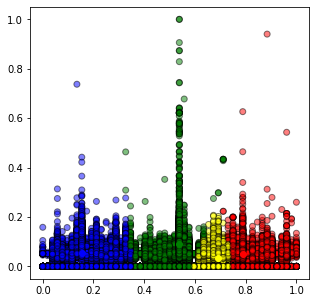

In [27]:
# menampilkan jarak menggunakan scatterplot
fig = plt.figure(figsize=(5, 5))
plt.scatter(df_copy['Kode_Daerah'], df_copy['Premi'], color=df_copy['color'], alpha=0.5, edgecolor='k')
for i in centroid_sebar.keys():
    plt.scatter(*centroid_sebar[i], color=colmap[i])
    
plt.show()

#elbow method

Text(0.5, 0, 'Banyak Cluster')

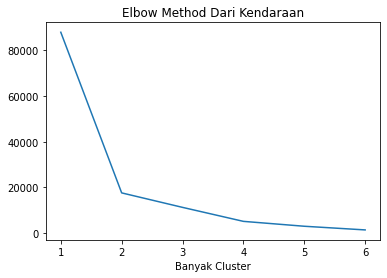

In [28]:
# menggunakan elbow method
from sklearn.cluster import KMeans # lib hanya dipakai untuk elbow method
wcss=[]
x = df_copy.iloc[:, 1:3] 
for i in range(1,7):
    #Solusi cluster dengan cluster i
    kmeans = KMeans(i)
    # Fit the data
    kmeans.fit(x)
    # Temukan WCSS untuk iterasi saat ini
    wcss_iter = kmeans.inertia_
    # Tambahkan nilai ke daftar WCSS
    wcss.append(wcss_iter)
number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('Elbow Method Dari Kendaraan')
plt.xlabel('Banyak Cluster')